## IPL (2008-2019) Data Analysis

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

C:\Users\Hp Pc\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import the Dataset

In [2]:
# load the data 
ipl = pd.read_csv('matches.csv')
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


###  Data Exploration 

** Check the dimension of the Data**

In [3]:
ipl.shape

(756, 18)

**Check Feature names**

In [4]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**Concise summary of the Data**

In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

 **Check Null Values**

In [6]:
ipl.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**Check types of each Variable**

In [7]:
ipl.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

**Check for count of Unique Values in each variable***

In [8]:
ipl.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

## Data Analysis

### - Which player got the maximum man of the match award?

In [9]:
ipl['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
                  ..
HH Gibbs           1
S Curran           1
P Shaw             1
MS Gony            1
SM Katich          1
Name: player_of_match, Length: 226, dtype: int64

In [10]:
# getting the top 10 most man of the match winners
ipl['player_of_match'].value_counts()[:10]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

In [11]:
# list of man of the match winners
list(ipl['player_of_match'].value_counts()[:10].keys())

['CH Gayle',
 'AB de Villiers',
 'RG Sharma',
 'DA Warner',
 'MS Dhoni',
 'YK Pathan',
 'SR Watson',
 'SK Raina',
 'G Gambhir',
 'V Kohli']

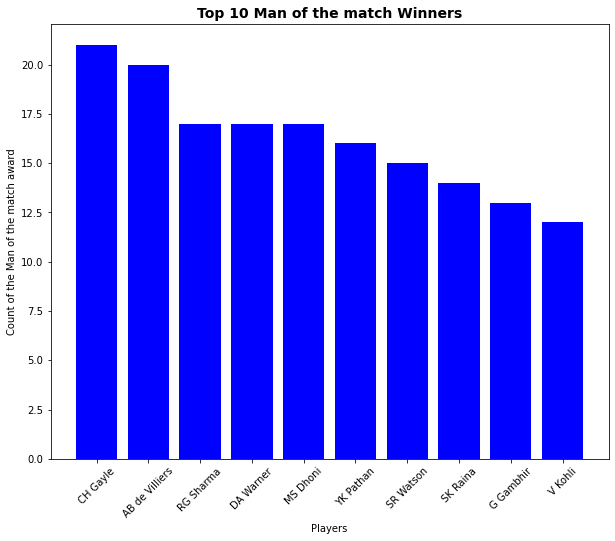

In [12]:
# visualisation
plt.figure (figsize = (10,8))
plt.bar(list(ipl['player_of_match'].value_counts()[:10].keys()), list(ipl['player_of_match'].value_counts()[:10]), color = 'b')
plt.title("Top 10 Man of the match Winners", fontsize = 14, weight = "bold")
plt.xlabel("Players")
plt.ylabel("Count of the Man of the match award")
plt.xticks(rotation= 45)
plt.show()

### Answer :
* **Chris Gayle** has won maximum Player of the match award, ie 21.

### - Most number of toss winner Team?

In [13]:
# getting count of toss win by each team
ipl['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

### Answer:
* **Mumbai Indians** has won the toss 98 times , highest amongst all teams.

### - Impact of Toss Decision on winning the match

In [14]:
win_by_toss = ipl.groupby('toss_decision')["win_by_runs"].count().reset_index()
win_by_toss.columns = ['Decision', 'Win_count']
win_by_toss

,Decision,Win_count
0,bat,293
1,field,463


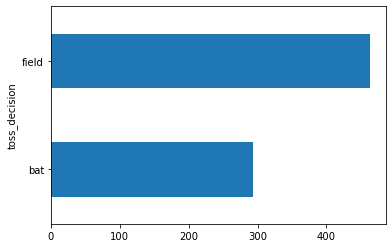

In [15]:
# visualising count of wins based on toss decision 
ipl.groupby('toss_decision')["win_by_runs"].count().sort_values().plot(kind = 'barh')

### Answer:
* Teams who have elected to **bowl/field first** have won more number of matches **(463)** than teams who have batted first (293).
* Teams who **bat first** have around **61%** chance of winning the match.

### - Highest number of matches played in which season ?

In [16]:
# checking total count of season & matches played in each season
ipl['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

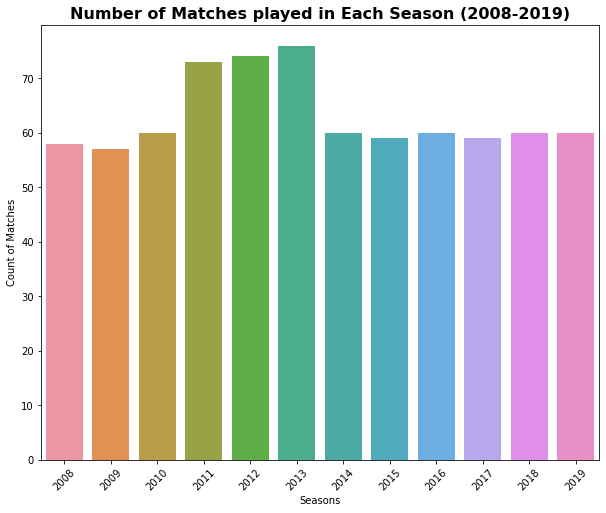

In [17]:
# visualising number of matches played in each season
plt.figure(figsize = (10,8))
sns.countplot(ipl['season'])
plt.title("Number of Matches played in Each Season (2008-2019)", fontsize = 16, weight = "bold")
plt.xlabel("Seasons")
plt.ylabel("Count of Matches")
plt.xticks(rotation = 45)
plt.show()

### Answer:
* In **Season 2013** , total number of matches played was **76**, which was highest for any reason.
* Season 2009 witnessed the least number of matches ie 57.

###  - Team with maximum wins by batting first?

In [18]:
# batting first team winner
batting_first = ipl[ipl['win_by_runs']!= 0]

In [19]:
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


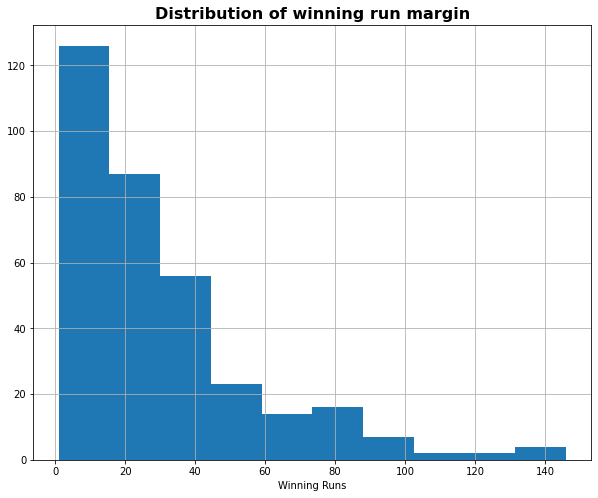

In [20]:
plt.figure(figsize =(10,8))
batting_first['win_by_runs'].hist()
plt.title('Distribution of winning run margin', fontsize = 16, weight = "bold")
plt.xlabel('Winning Runs')
plt.show()

In [21]:
# top 5 teams who have won maximum matches by batting first
batting_first['winner'].value_counts()[:5]

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Name: winner, dtype: int64

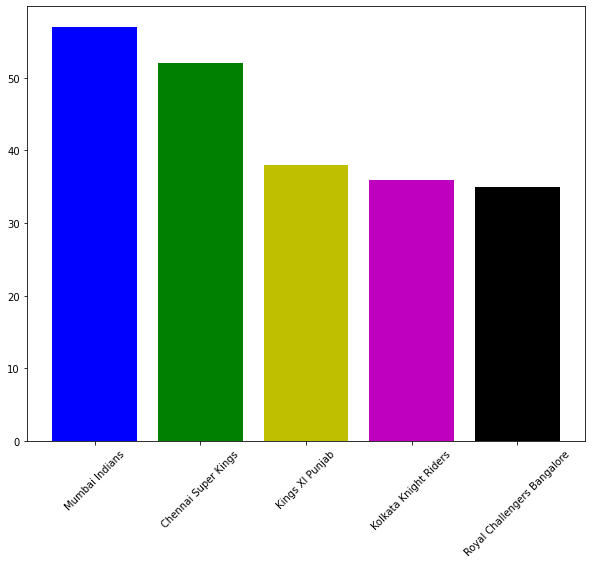

In [22]:
plt.figure(figsize =(10,8))
plt.bar(list(batting_first['winner'].value_counts()[:5].keys()),
        list(batting_first['winner'].value_counts()[:5]),
        color = ['b','g','y','m','k'])
plt.xticks(rotation = 45)
plt.show()

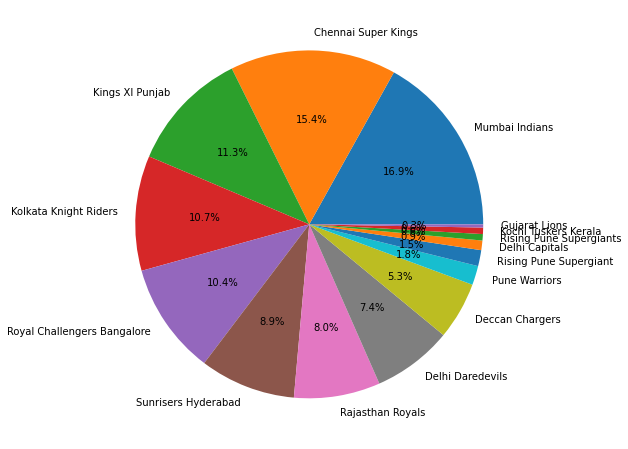

In [23]:
# pie chart to show case the winning percentage of teams while batting first
plt.figure(figsize =(10,8))
plt.pie(list(batting_first['winner'].value_counts()),
        labels = list(batting_first['winner'].value_counts().keys()),
        autopct = "%0.1f%%")
plt.show()

### Answer:
* **Mumbai Indians** won **57** matches , maximum by any team , while batting first. 

### - Which team has the maximum winning run margin & get the complete match details

In [24]:
# maximum run margin by any winning team 
ipl['win_by_runs'].max()

146

In [25]:
# get the overall detail of the match
ipl[ipl['win_by_runs']== 146]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


### Answer:
* **Mumbai Indians** has defeated Delhi Daredevils by **146 runs** , which is the maximum winning run margin by any team.

### - Team with maximum wins by batting second/ bowing first?

In [26]:
# batting second team winner
batting_second = ipl[ipl['win_by_wickets']!= 0]

In [27]:
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


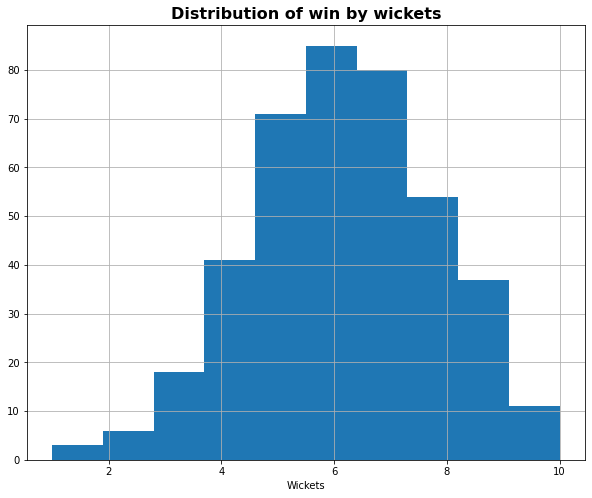

In [28]:
plt.figure(figsize =(10,8))
batting_second['win_by_wickets'].hist()
plt.title('Distribution of win by wickets', fontsize = 16, weight = "bold")
plt.xlabel('Wickets')
plt.show()

In [29]:
# top 5 teams , with count of wins by batting second
batting_second['winner'].value_counts()[:5]

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Name: winner, dtype: int64

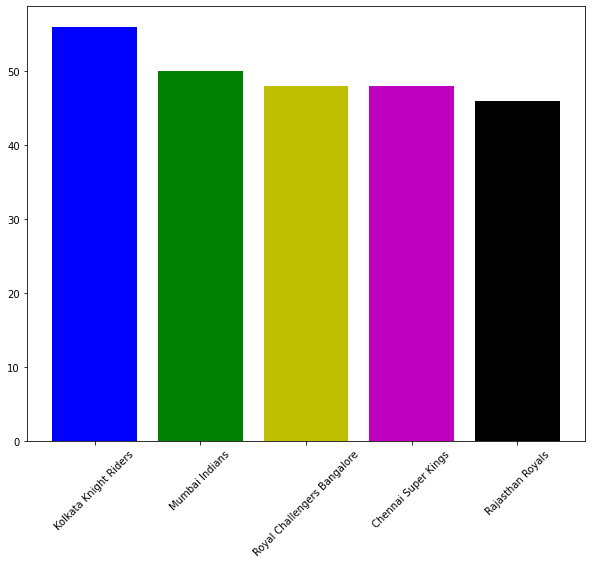

In [30]:
plt.figure(figsize =(10,8))
plt.bar(list(batting_second['winner'].value_counts()[:5].keys()),
        list(batting_second['winner'].value_counts()[:5]),
        color = ['b','g','y','m','k'])
plt.xticks(rotation = 45)
plt.show()

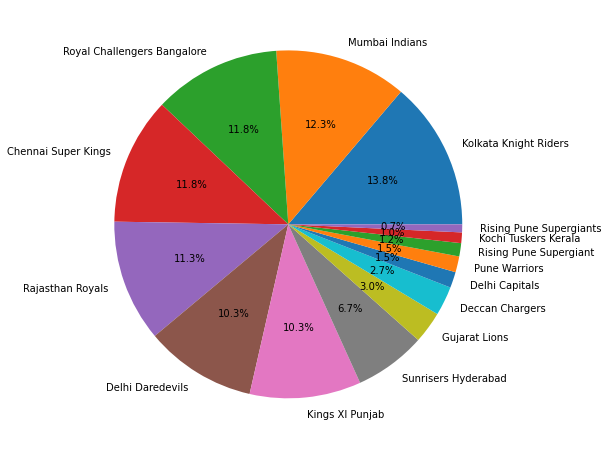

In [31]:
# pie chart to show case the winning percentage of teams while batting second
plt.figure(figsize =(10,8))
plt.pie(list(batting_second['winner'].value_counts()),
        labels = list(batting_second['winner'].value_counts().keys()),
        autopct = "%0.1f%%")
plt.show()

### Answer:
* **Kolkota Knight Rider** has won maximum matches ie **56** ,by **batting second**.

### - Number of Matches Hosted at each Stadium

In [32]:
# top 10 venue names & count of matches hosted by them 
ipl['venue'].value_counts()[:10]

Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Dr DY Patil Sports Academy                    17
Name: venue, dtype: int64

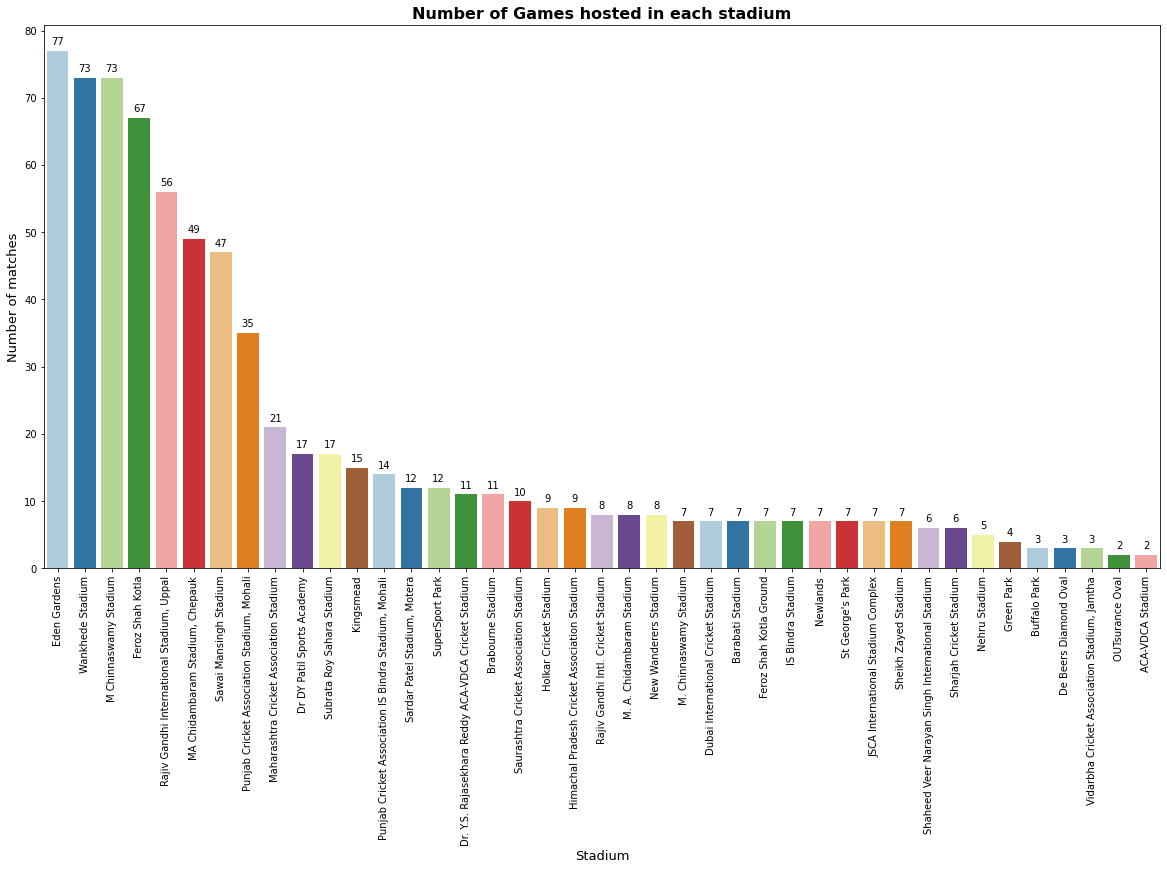

In [33]:
# Visualising venue names & count of matches hosted by them 
plt.figure(figsize = (20,10))
splot = sns.countplot(ipl['venue'], order = ipl['venue'].value_counts().index, palette = "Paired")
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Number of Games hosted in each stadium", fontsize = 16, weight = "bold")
plt.xlabel("Stadium", fontsize = 13)
plt.ylabel("Number of matches", fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

### Answer:
* **Eden garden** hosted most number of IPL matches ie **77**.